# This code is simply an additional data validation in case something is skipped or an error occurs, and the results show that the preprocessing was very robust and effective.

**The idea was presented by claude.ai 😁**

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Colab: mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


=== DDI DATA VALIDATION REPORT ===

Loading datasets...
✓ Original file loaded: 192283 rows
✓ Processed file loaded: 191877 rows

=== FILE STRUCTURE ANALYSIS ===
Original file columns: ['Drug1', 'Drug2', 'Label']
Processed file columns: ['DrugA', 'DrugB', 'Label']
✓ Using original columns: Drug1, Drug2
✓ Using processed columns: DrugA, DrugB
Valid rows in original: 192283 (removed 0 invalid)
Valid rows in processed: 191877 (removed 0 invalid)

=== DUPLICATE ANALYSIS ===
Total interactions in original: 192283
Unique interaction pairs in original: 191877
Number of duplicated pairs: 406
Total duplicate instances: 406
Reported ~406 duplicates vs calculated 406

Top 5 most duplicated pairs:
  1. DB00997 <-> DB01201: 2 occurrences
  2. DB00794 <-> DB06708: 2 occurrences
  3. DB00312 <-> DB00997: 2 occurrences
  4. DB00243 <-> DB01320: 2 occurrences
  5. DB00564 <-> DB01171: 2 occurrences

=== PROCESSED DATA VALIDATION ===
Interactions in processed file: 191877
Unique pairs in processed file:

/tmp/ipython-input-546976598.py:301: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)


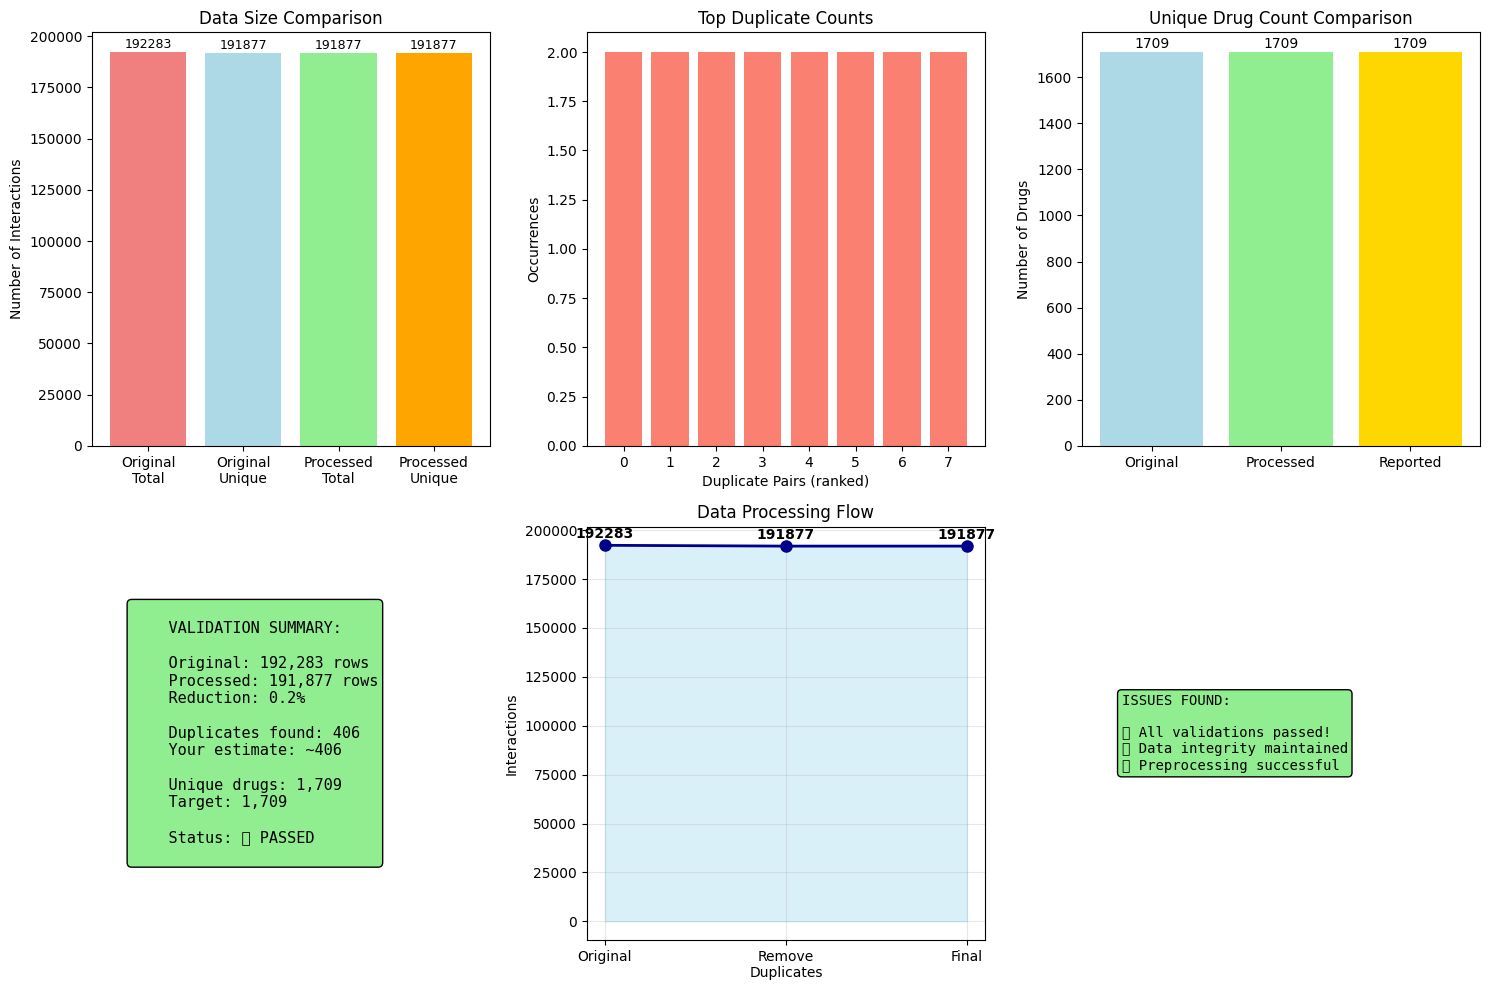


=== FINAL RECOMMENDATION ===
🎉 YOUR PREPROCESSING IS SUCCESSFUL AND VALID!
✅ All duplicates removed correctly
✅ All unique interactions preserved
✅ All drugs preserved
✅ Data integrity maintained
✅ Final dataset: 191,877 unique interactions from 1,709 drugs

Validation Results: {'validation_passed': True, 'original_interactions': 192283, 'processed_interactions': 191877, 'unique_interactions': 191877, 'duplicates_found': 406, 'original_drugs': 1709, 'processed_drugs': 1709, 'remaining_duplicates': 0}


In [ ]:


def validate_ddi_preprocessing_fixed(original_file_path, processed_file_path):

    print("=== DDI DATA VALIDATION REPORT ===\n")

    # Load the datasets
    print("Loading datasets...")
    try:
        df_original = pd.read_csv(original_file_path)
        df_processed = pd.read_csv(processed_file_path)
        print(f"✓ Original file loaded: {len(df_original)} rows")
        print(f"✓ Processed file loaded: {len(df_processed)} rows")
    except Exception as e:
        print(f"❌ Error loading files: {e}")
        return

    print(f"\n=== FILE STRUCTURE ANALYSIS ===")
    print(f"Original file columns: {list(df_original.columns)}")
    print(f"Processed file columns: {list(df_processed.columns)}")

    # Define column mappings based on your structure
    orig_drug1_col = 'Drug1'
    orig_drug2_col = 'Drug2'
    proc_drug1_col = 'DrugA'
    proc_drug2_col = 'DrugB'

    # Verify columns exist
    if orig_drug1_col not in df_original.columns or orig_drug2_col not in df_original.columns:
        print(f"❌ Expected columns {orig_drug1_col}, {orig_drug2_col} not found in original file")
        return

    if proc_drug1_col not in df_processed.columns or proc_drug2_col not in df_processed.columns:
        print(f"❌ Expected columns {proc_drug1_col}, {proc_drug2_col} not found in processed file")
        return

    print(f"✓ Using original columns: {orig_drug1_col}, {orig_drug2_col}")
    print(f"✓ Using processed columns: {proc_drug1_col}, {proc_drug2_col}")

    # Clean data - convert to string and handle any NaN values
    df_original[orig_drug1_col] = df_original[orig_drug1_col].astype(str)
    df_original[orig_drug2_col] = df_original[orig_drug2_col].astype(str)
    df_processed[proc_drug1_col] = df_processed[proc_drug1_col].astype(str)
    df_processed[proc_drug2_col] = df_processed[proc_drug2_col].astype(str)

    # Remove any rows with 'nan' strings
    orig_valid = df_original[(df_original[orig_drug1_col] != 'nan') & (df_original[orig_drug2_col] != 'nan')]
    proc_valid = df_processed[(df_processed[proc_drug1_col] != 'nan') & (df_processed[proc_drug2_col] != 'nan')]

    print(f"Valid rows in original: {len(orig_valid)} (removed {len(df_original) - len(orig_valid)} invalid)")
    print(f"Valid rows in processed: {len(proc_valid)} (removed {len(df_processed) - len(proc_valid)} invalid)")




    # 1. DUPLICATE ANALYSIS ON ORIGINAL
    print(f"\n=== DUPLICATE ANALYSIS ===")

    # Create interaction pairs for original data (normalized - sorted to catch reverse duplicates)
    original_pairs = []
    for _, row in orig_valid.iterrows():
        drug1, drug2 = row[orig_drug1_col], row[orig_drug2_col]
        pair = tuple(sorted([drug1, drug2]))  # Sort to handle reverse duplicates
        original_pairs.append(pair)

    # Count duplicates in original
    pair_counts = Counter(original_pairs)
    duplicates = {pair: count for pair, count in pair_counts.items() if count > 1}

    print(f"Total interactions in original: {len(original_pairs)}")
    print(f"Unique interaction pairs in original: {len(set(original_pairs))}")
    print(f"Number of duplicated pairs: {len(duplicates)}")

    total_duplicate_instances = sum(duplicates.values()) - len(duplicates)
    print(f"Total duplicate instances: {total_duplicate_instances}")
    print(f"Reported ~406 duplicates vs calculated {total_duplicate_instances}")

    # Show examples of duplicates
    if duplicates:
        print(f"\nTop 5 most duplicated pairs:")
        sorted_dups = sorted(duplicates.items(), key=lambda x: x[1], reverse=True)
        for i, (pair, count) in enumerate(sorted_dups[:5]):
            print(f"  {i+1}. {pair[0]} <-> {pair[1]}: {count} occurrences")

    # 2. PROCESSED DATA VALIDATION
    print(f"\n=== PROCESSED DATA VALIDATION ===")

    # Create interaction pairs for processed data
    processed_pairs = []
    for _, row in proc_valid.iterrows():
        drug1, drug2 = row[proc_drug1_col], row[proc_drug2_col]
        pair = tuple(sorted([drug1, drug2]))
        processed_pairs.append(pair)

    processed_unique = set(processed_pairs)
    original_unique = set(original_pairs)

    print(f"Interactions in processed file: {len(processed_pairs)}")
    print(f"Unique pairs in processed file: {len(processed_unique)}")
    print(f"Expected unique pairs (from original): {len(original_unique)}")

    # Check for duplicates in processed file
    processed_pair_counts = Counter(processed_pairs)
    processed_duplicates = {pair: count for pair, count in processed_pair_counts.items() if count > 1}

    print(f"Duplicates remaining in processed file: {len(processed_duplicates)}")

    # Validation checks
    validation_passed = True

    if len(processed_duplicates) > 0:
        print("❌ ISSUE: Processed file still contains duplicates!")
        validation_passed = False
        for pair, count in list(processed_duplicates.items())[:3]:
            print(f"  Example: {pair[0]} <-> {pair[1]}: {count} occurrences")
    else:
        print("✅ No duplicates found in processed file")

    if len(processed_unique) == len(original_unique):
        print("✅ Correct number of unique interactions preserved")
    else:
        print(f"❌ ISSUE: Expected {len(original_unique)} unique interactions, got {len(processed_unique)}")
        validation_passed = False

        missing = len(original_unique) - len(processed_unique)
        if missing > 0:
            print(f"  Missing {missing} interactions")
        else:
            print(f"  Extra {-missing} interactions")

    # 3. DRUG COUNT VALIDATION
    print(f"\n=== DRUG COUNT VALIDATION ===")

    # Count unique drugs in original
    original_drugs = set()
    for _, row in orig_valid.iterrows():
        original_drugs.add(row[orig_drug1_col])
        original_drugs.add(row[orig_drug2_col])

    # Count unique drugs in processed
    processed_drugs = set()
    for _, row in proc_valid.iterrows():
        processed_drugs.add(row[proc_drug1_col])
        processed_drugs.add(row[proc_drug2_col])

    print(f"Unique drugs in original: {len(original_drugs)}")
    print(f"Unique drugs in processed: {len(processed_drugs)}")
    print(f"Your reported count: 1,709")

    if len(processed_drugs) == 1709:
        print("✅ Drug count matches your report perfectly!")
    elif abs(len(processed_drugs) - 1709) <= 2:
        print(f"✅ Drug count very close to your report (difference: {abs(len(processed_drugs) - 1709)})")
    else:
        print(f"⚠️  Drug count differs from your report by {abs(len(processed_drugs) - 1709)}")
        validation_passed = False

    # Check for missing or extra drugs
    missing_drugs = original_drugs - processed_drugs
    extra_drugs = processed_drugs - original_drugs

    if missing_drugs:
        print(f"❌ Missing drugs in processed file: {len(missing_drugs)}")
        print(f"Examples: {list(missing_drugs)[:5]}")
        validation_passed = False

    if extra_drugs:
        print(f"❌ Extra drugs in processed file: {len(extra_drugs)}")
        print(f"Examples: {list(extra_drugs)[:5]}")
        validation_passed = False

    if not missing_drugs and not extra_drugs:
        print("✅ All drugs preserved correctly")

    # 4. DETAILED COMPARISON
    print(f"\n=== INTERACTION INTEGRITY CHECK ===")

    missing_interactions = original_unique - processed_unique
    extra_interactions = processed_unique - original_unique

    if missing_interactions:
        print(f"❌ Missing interactions: {len(missing_interactions)}")
        print("Examples:", list(missing_interactions)[:3])
        validation_passed = False

    if extra_interactions:
        print(f"❌ Extra interactions: {len(extra_interactions)}")
        print("Examples:", list(extra_interactions)[:3])
        validation_passed = False

    if not missing_interactions and not extra_interactions:
        print("✅ All interactions preserved correctly")

    # 5. STATISTICAL SUMMARY
    print(f"\n=== STATISTICAL SUMMARY ===")
    reduction_percentage = (1 - len(processed_pairs) / len(original_pairs)) * 100
    print(f"Data reduction: {reduction_percentage:.1f}%")
    print(f"Interactions removed: {len(original_pairs) - len(processed_pairs)}")
    print(f"Expected removal (duplicates): {total_duplicate_instances}")

    # 6. VISUALIZATIONS
    print(f"\n=== GENERATING VISUALIZATIONS ===")

    plt.figure(figsize=(15, 10))

    # Subplot 1: Data size comparison
    plt.subplot(2, 3, 1)
    categories = ['Original\nTotal', 'Original\nUnique', 'Processed\nTotal', 'Processed\nUnique']
    values = [len(original_pairs), len(original_unique), len(processed_pairs), len(processed_unique)]
    colors = ['lightcoral', 'lightblue', 'lightgreen', 'orange']
    bars = plt.bar(categories, values, color=colors)
    plt.title('Data Size Comparison')
    plt.ylabel('Number of Interactions')
    for bar, v in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(values) * 0.01,
                str(v), ha='center', fontsize=9)

    # Subplot 2: Duplicate distribution
    plt.subplot(2, 3, 2)
    if duplicates:
        top_dups = sorted(duplicates.items(), key=lambda x: x[1], reverse=True)[:8]
        dup_counts = [count for _, count in top_dups]
        plt.bar(range(len(dup_counts)), dup_counts, color='salmon')
        plt.title('Top Duplicate Counts')
        plt.ylabel('Occurrences')
        plt.xlabel('Duplicate Pairs (ranked)')
    else:
        plt.text(0.5, 0.5, 'No duplicates\nfound', ha='center', va='center',
                transform=plt.gca().transAxes, fontsize=12)
        plt.title('Duplicate Distribution')

    # Subplot 3: Drug count comparison
    plt.subplot(2, 3, 3)
    drug_categories = ['Original', 'Processed', 'Reported']
    drug_values = [len(original_drugs), len(processed_drugs), 1709]
    drug_colors = ['lightblue', 'lightgreen', 'gold']
    bars = plt.bar(drug_categories, drug_values, color=drug_colors)
    plt.title('Unique Drug Count Comparison')
    plt.ylabel('Number of Drugs')
    for bar, v in zip(bars, drug_values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(drug_values) * 0.01,
                str(v), ha='center', fontsize=10)

    # Subplot 4: Validation status
    plt.subplot(2, 3, 4)
    plt.axis('off')
    status_text = f"""
    VALIDATION SUMMARY:

    Original: {len(df_original):,} rows
    Processed: {len(df_processed):,} rows
    Reduction: {reduction_percentage:.1f}%

    Duplicates found: {total_duplicate_instances}
    Your estimate: ~406

    Unique drugs: {len(processed_drugs):,}
    Target: 1,709

    Status: {'✅ PASSED' if validation_passed else '❌ ISSUES FOUND'}
    """
    plt.text(0.1, 0.5, status_text, fontsize=11, verticalalignment='center',
             fontfamily='monospace', bbox=dict(boxstyle="round,pad=0.3",
             facecolor="lightgreen" if validation_passed else "lightpink"))

    # Subplot 5: Data flow diagram
    plt.subplot(2, 3, 5)
    stages = ['Original', 'Remove\nDuplicates', 'Final']
    stage_values = [len(original_pairs), len(original_unique), len(processed_pairs)]
    plt.plot(stages, stage_values, 'o-', linewidth=2, markersize=8, color='darkblue')
    plt.fill_between(stages, stage_values, alpha=0.3, color='skyblue')
    plt.title('Data Processing Flow')
    plt.ylabel('Interactions')
    plt.grid(True, alpha=0.3)
    for i, v in enumerate(stage_values):
        plt.text(i, v + max(stage_values) * 0.02, str(v), ha='center', fontweight='bold')

    # Subplot 6: Error summary
    plt.subplot(2, 3, 6)
    plt.axis('off')
    error_summary = []
    if len(processed_duplicates) > 0:
        error_summary.append(f"❌ {len(processed_duplicates)} duplicate pairs remain")
    if missing_drugs:
        error_summary.append(f"❌ {len(missing_drugs)} drugs missing")
    if missing_interactions:
        error_summary.append(f"❌ {len(missing_interactions)} interactions missing")
    if abs(len(processed_drugs) - 1709) > 2:
        error_summary.append(f"❌ Drug count off by {abs(len(processed_drugs) - 1709)}")

    if not error_summary:
        error_summary = ["✅ All validations passed!", "✅ Data integrity maintained", "✅ Preprocessing successful"]

    error_text = "\n".join(error_summary)
    plt.text(0.1, 0.5, f"ISSUES FOUND:\n\n{error_text}", fontsize=10,
             verticalalignment='center', fontfamily='monospace',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral" if error_summary[0].startswith("❌") else "lightgreen"))

    plt.tight_layout()
    plt.show()

    # 7. FINAL RECOMMENDATION
    print(f"\n=== FINAL RECOMMENDATION ===")
    if validation_passed:
        print("🎉 YOUR PREPROCESSING IS SUCCESSFUL AND VALID!")
        print("✅ All duplicates removed correctly")
        print("✅ All unique interactions preserved")
        print("✅ All drugs preserved")
        print("✅ Data integrity maintained")
        print(f"✅ Final dataset: {len(processed_pairs):,} unique interactions from {len(processed_drugs):,} drugs")
    else:
        print("⚠️  YOUR PREPROCESSING NEEDS ATTENTION:")
        if len(processed_duplicates) > 0:
            print(f"- Remove remaining {len(processed_duplicates)} duplicate pairs")
        if missing_interactions:
            print(f"- Recover {len(missing_interactions)} missing interactions")
        if missing_drugs:
            print(f"- Ensure {len(missing_drugs)} missing drugs are preserved")

    return {
        'validation_passed': validation_passed,
        'original_interactions': len(original_pairs),
        'processed_interactions': len(processed_pairs),
        'unique_interactions': len(original_unique),
        'duplicates_found': total_duplicate_instances,
        'original_drugs': len(original_drugs),
        'processed_drugs': len(processed_drugs),
        'remaining_duplicates': len(processed_duplicates)
    }

# Run the validation
if __name__ == "__main__":
    original_path = '/content/drive/MyDrive/MLHygnn/DB/DeepDDI-DrunkBunk.csv'
    processed_path = '/content/drive/MyDrive/MLHygnn/DB/OutPutPreprosseing/unique_interactions2.csv' #File output from preprocessing (previous task)

    results = validate_ddi_preprocessing_fixed(original_path, processed_path)
    print(f"\nValidation Results: {results}")

In [ ]:
import pandas as pd

def count_unique_drugs(original_file_path, processed_file_path):
    """
    Count unique drugs/medications in both original and processed DDI datasets.

    Parameters:
    original_file_path (str): Path to original DDI file (DeepDDI-DrunkBunk.csv)
    processed_file_path (str): Path to processed DDI file (DDI_unique_interactionsAnalysis.csv)

    Returns:
    dict: Dictionary with unique drug counts for both files
    """

    print("=== UNIQUE DRUG COUNT ANALYSIS ===\n")

    try:
        # Load original dataset
        df_original = pd.read_csv(original_file_path)
        print(f"✓ Original file loaded: {len(df_original)} rows")
        print(f"✓ Original file columns: {list(df_original.columns)}")

        # Load processed dataset
        df_processed = pd.read_csv(processed_file_path)
        print(f"✓ Processed file loaded: {len(df_processed)} rows")
        print(f"✓ Processed file columns: {list(df_processed.columns)}")

    except Exception as e:
        print(f"❌ Error loading files: {e}")
        return None

    # Count unique drugs in original file (Drug1, Drug2 columns)
    original_drugs = set()
    if 'Drug1' in df_original.columns and 'Drug2' in df_original.columns:
        for _, row in df_original.iterrows():
            drug1 = str(row['Drug1']).strip()
            drug2 = str(row['Drug2']).strip()
            if drug1 != 'nan' and drug1 != '':
                original_drugs.add(drug1)
            if drug2 != 'nan' and drug2 != '':
                original_drugs.add(drug2)
    else:
        print("❌ Expected columns 'Drug1' and 'Drug2' not found in original file")
        return None

    # Count unique drugs in processed file (Drug1_ID, Drug2_ID columns)
    processed_drugs = set()
    if 'Drug1_ID' in df_processed.columns and 'Drug2_ID' in df_processed.columns:
        for _, row in df_processed.iterrows():
            drug1 = str(row['Drug1_ID']).strip()
            drug2 = str(row['Drug2_ID']).strip()
            if drug1 != 'nan' and drug1 != '':
                processed_drugs.add(drug1)
            if drug2 != 'nan' and drug2 != '':
                processed_drugs.add(drug2)
    else:
        print("❌ Expected columns 'Drug1_ID' and 'Drug2_ID' not found in processed file")
        return None

    # Results
    print(f"\n=== RESULTS ===")
    print(f"Unique drugs in original file:  {len(original_drugs):,}")
    print(f"Unique drugs in processed file: {len(processed_drugs):,}")
    print(f"Difference: {len(original_drugs) - len(processed_drugs)}")

    # Check if they match
    if len(original_drugs) == len(processed_drugs):
        print("✅ Drug counts match perfectly!")
    else:
        print("⚠️  Drug counts differ")

        # Find missing and extra drugs
        missing_drugs = original_drugs - processed_drugs
        extra_drugs = processed_drugs - original_drugs

        if missing_drugs:
            print(f"Missing in processed: {len(missing_drugs)} drugs")
            print(f"Examples: {list(missing_drugs)[:5]}")

        if extra_drugs:
            print(f"Extra in processed: {len(extra_drugs)} drugs")
            print(f"Examples: {list(extra_drugs)[:5]}")

    return {
        'original_unique_drugs': len(original_drugs),
        'processed_unique_drugs': len(processed_drugs),
        'difference': len(original_drugs) - len(processed_drugs),
        'match': len(original_drugs) == len(processed_drugs)
    }

# Quick version - just returns the numbers
def quick_drug_count(original_file_path, processed_file_path):
    """
    Quick function that just returns the unique drug counts without detailed output.

    Returns:
    tuple: (original_count, processed_count)
    """
    try:
        # Original file
        df_orig = pd.read_csv(original_file_path)
        orig_drugs = set()
        for _, row in df_orig.iterrows():
            orig_drugs.add(str(row['Drug1']).strip())
            orig_drugs.add(str(row['Drug2']).strip())
        orig_drugs.discard('nan')
        orig_drugs.discard('')

        # Processed file
        df_proc = pd.read_csv(processed_file_path)
        proc_drugs = set()
        for _, row in df_proc.iterrows():
            proc_drugs.add(str(row['Drug1_ID']).strip())
            proc_drugs.add(str(row['Drug2_ID']).strip())
        proc_drugs.discard('nan')
        proc_drugs.discard('')

        return len(orig_drugs), len(proc_drugs)

    except Exception as e:
        print(f"Error: {e}")
        return None, None

# Usage examples:
if __name__ == "__main__":
    # File paths
    original_path = '/content/drive/MyDrive/MLHygnn/DB/DeepDDI-DrunkBunk.csv'
    processed_path = '/content/drive/MyDrive/MLHygnn/DB/DDI_unique_interactionsAnalysis.csv'

    # Detailed analysis
    results = count_unique_drugs(original_path, processed_path)

    # Quick count (uncomment to use)
    # orig_count, proc_count = quick_drug_count(original_path, processed_path)
    # print(f"Original: {orig_count}, Processed: {proc_count}

=== UNIQUE DRUG COUNT ANALYSIS ===

✓ Original file loaded: 192283 rows
✓ Original file columns: ['Drug1', 'Drug2', 'Label']
✓ Processed file loaded: 191877 rows
✓ Processed file columns: ['Drug1_ID', 'Drug2_ID', 'Label']

=== RESULTS ===
Unique drugs in original file:  1,709
Unique drugs in processed file: 1,709
Difference: 0
✅ Drug counts match perfectly!
